In [1]:
# ============================================
# STEP 1 — Import Libraries
# ============================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# ============================================
# STEP 2 — Read and Clean Data
# ============================================
df = pd.read_csv("data.csv", low_memory=False)

# ---- Convert Price ----
def convert_price(price):
    price = str(price).replace(",", "").strip()
    if "Crore" in price:
        return float(price.replace("Crore", "")) * 10_000_000
    elif "Lakh" in price:
        return float(price.replace("Lakh", "")) * 100_000
    else:
        try:
            return float(price)
        except:
            return np.nan

# ---- Convert Area ----
def convert_area(area):
    area = str(area).replace(",", "").strip()
    if "Kanal" in area:
        return float(area.replace("Kanal", "")) * 5445
    elif "Marla" in area:
        return float(area.replace("Marla", "")) * 272.25
    else:
        try:
            return float(area)
        except:
            return np.nan

In [3]:
# Apply conversions
df["Price"] = df["Price"].apply(convert_price)
df["Area"] = df["Area"].apply(convert_area)
df["Price"] = df["Price"] / 1_000_000   # Convert to millions


In [4]:
# Clean missing data
df = df.dropna(subset=["Price", "Area"])
df["Room"] = pd.to_numeric(df["Room"], errors='coerce').fillna(df["Room"].median())
df["Bath Room"] = pd.to_numeric(df["Bath Room"], errors='coerce').fillna(df["Bath Room"].median())

# STEP 3 — Prepare Data
X = df[["Area", "Room", "Bath Room"]].values
Y = df["Price"].values.reshape(-1, 1)

# Normalize features
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

In [5]:
# Add intercept
X = np.hstack((np.ones((X.shape[0], 1)), X))

# Split into train/test
train_X = X[:500]
test_X = X[500:]
train_Y = Y[:500]
test_Y = Y[500:]

# STEP 4 — Train Using Gradient Descent
m, n = train_X.shape
weights = np.zeros((n, 1))
L = 0.01
epochs = 1000
losses = []

In [6]:
for i in range(epochs):
    pred = train_X @ weights
    error = pred - train_Y
    mse = np.mean(error ** 2)
    losses.append(mse)

    grad = (2/m) * (train_X.T @ error)
    weights -= L * grad

    if i % 100 == 0:
        print(f"Epoch {i}: MSE = {mse:.4f}")

print("\nFinal Equation:")
print(f"Price = {weights[0][0]:.2f} + {weights[1][0]:.2f}*Area + {weights[2][0]:.2f}*Rooms + {weights[3][0]:.2f}*Bathrooms")


Epoch 0: MSE = 35213.9519
Epoch 100: MSE = 7800.4894
Epoch 200: MSE = 7404.5468
Epoch 300: MSE = 7394.0813
Epoch 400: MSE = 7393.1932
Epoch 500: MSE = 7392.9650
Epoch 600: MSE = 7392.8933
Epoch 700: MSE = 7392.8703
Epoch 800: MSE = 7392.8630
Epoch 900: MSE = 7392.8606

Final Equation:
Price = 110.02 + 107.61*Area + 18.23*Rooms + -12.76*Bathrooms


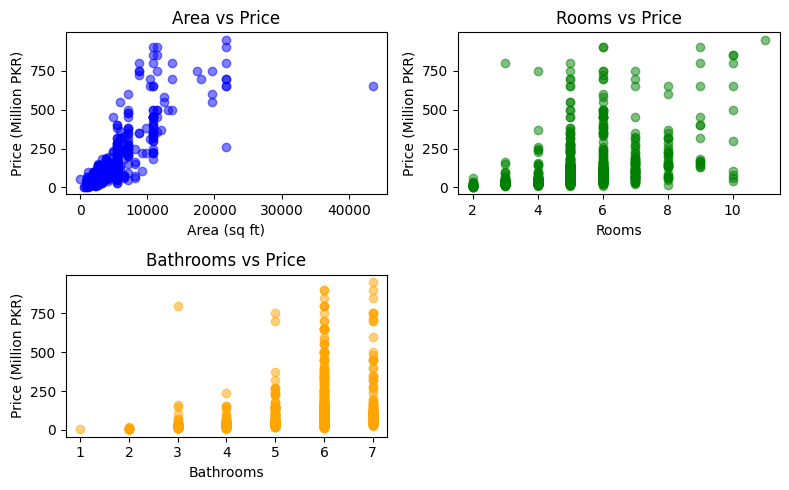

In [7]:
# STEP 5 — PLOTS

# (a) Plot each feature with Price
plt.figure(figsize=(8, 5))

# --- 1st subplot ---
plt.subplot(2, 2, 1)
plt.scatter(df["Area"], df["Price"], color='blue', alpha=0.5)
plt.xlabel("Area (sq ft)")
plt.ylabel("Price (Million PKR)")
plt.title("Area vs Price")

plt.subplot(2, 2, 2)
plt.scatter(df["Room"], df["Price"], color='green', alpha=0.5)
plt.xlabel("Rooms")
plt.ylabel("Price (Million PKR)")
plt.title("Rooms vs Price")

plt.subplot(2, 2, 3)
plt.scatter(df["Bath Room"], df["Price"], color='orange', alpha=0.5)
plt.xlabel("Bathrooms")
plt.ylabel("Price (Million PKR)")
plt.title("Bathrooms vs Price")

plt.tight_layout()
plt.show()

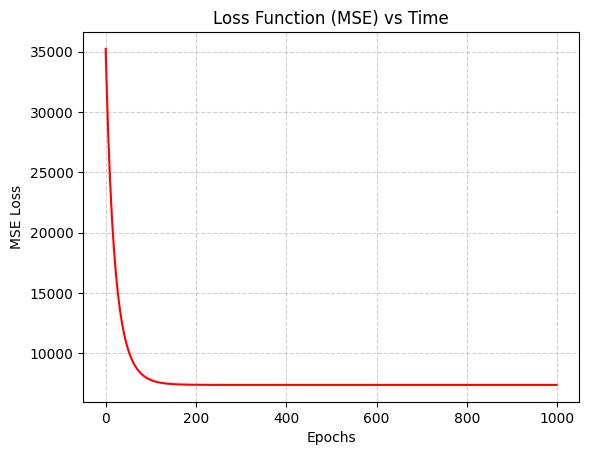

Text(0.5, 1.0, 'Regression Line with Area (Predicted vs Actual)')

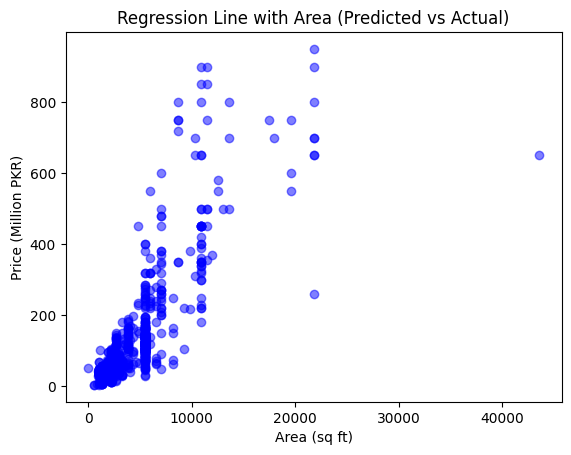

In [8]:
# (b) Plot Loss function
plt.plot(range(epochs), losses, color='red')
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.title("Loss Function (MSE) vs Time")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# (c) Plot Final Equation with two features (Area vs Price)
plt.scatter(df["Area"], df["Price"], color='blue', alpha=0.5, label='Actual Data')
plt.xlabel("Area (sq ft)")
plt.ylabel("Price (Million PKR)")
plt.title("Regression Line with Area (Predicted vs Actual)")